# Importing cricket dataset

I imported a cricket dataset containing information of batsmen and their stats. I realized that the read_csv function in pandas uses the utf-8 encoding by default, which was incompatible with this particular dataset, hence why I specified the correct encoding - latin1 

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pandas.read_csv("Cricket.csv", encoding='latin1')
df

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,CG Greenidge (WI),1975-1991,128,127,13,5134,133*,45.03,7908,64.92,11,31,3
75,Misbah-ul-Haq (PAK),2002-2015,162,149,31,5122,96*,43.40,6945,73.75,0,42,6
76,PD Collingwood (ENG),2001-2011,197,181,37,5092,120*,35.36,6614,76.98,5,26,7
77,A Symonds (AUS),1998-2009,198,161,33,5088,156,39.75,5504,92.44,6,30,15


# Duplicate and null check

In [52]:
duplicates = df.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

null_values_col = df.isnull().sum()
print(f"\nNull values in each column:\n{null_values_col}")

null_values_row = df.isnull().sum(axis=1)
print(f"\nNull values in each row:\n{null_values_row}")


Number of duplicate rows: 0

Null values in each column:
Player    0
Span      0
Mat       0
Inns      0
NO        0
Runs      0
HS        0
Ave       0
BF        0
SR        0
100       0
50        0
0         0
dtype: int64

Null values in each row:
0     0
1     0
2     0
3     0
4     0
     ..
74    0
75    0
76    0
77    0
78    0
Length: 79, dtype: int64


In [53]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  79 non-null     object 
 1   Span    79 non-null     object 
 2   Mat     79 non-null     int64  
 3   Inns    79 non-null     int64  
 4   NO      79 non-null     int64  
 5   Runs    79 non-null     int64  
 6   HS      79 non-null     object 
 7   Ave     79 non-null     float64
 8   BF      79 non-null     int64  
 9   SR      79 non-null     float64
 10  100     79 non-null     int64  
 11  50      79 non-null     int64  
 12  0       79 non-null     int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 8.2+ KB


# Creating new columns

In [54]:
start_year = df['Span'].str[:4].astype(int)  
end_year = df['Span'].str[5:].astype(int)    
df['Years Played'] = end_year - start_year  

df['Conversion Rate'] = (df['100'] / (df['100'] + df['50'])) * 100
df['Conversion Rate'] = df['Conversion Rate'].round(2)

df['Not Out Rate'] = (df['NO'] / df['Inns']) * 100
df['Not Out Rate'] = df['Not Out Rate'].round(2)

bins = [20, 30, 40, 50, 60]
labels = ['Low', 'Average', 'Good', 'Great']
df['Consistency'] = pd.cut(df['Ave'], bins=bins, labels=labels)

df['Playing Style'] = df['SR'].apply(lambda x: 'Aggressive' if x > 85 else 'Defensive')

df

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Years Played,Conversion Rate,Not Out Rate,Consistency,Playing Style
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20,23,33.79,9.07,Good,Aggressive
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15,15,21.19,10.79,Good,Defensive
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20,17,26.79,10.68,Good,Defensive
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34,22,29.17,4.16,Average,Aggressive
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28,17,19.79,9.33,Average,Defensive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,CG Greenidge (WI),1975-1991,128,127,13,5134,133*,45.03,7908,64.92,11,31,3,16,26.19,10.24,Good,Defensive
75,Misbah-ul-Haq (PAK),2002-2015,162,149,31,5122,96*,43.40,6945,73.75,0,42,6,13,0.00,20.81,Good,Defensive
76,PD Collingwood (ENG),2001-2011,197,181,37,5092,120*,35.36,6614,76.98,5,26,7,10,16.13,20.44,Average,Defensive
77,A Symonds (AUS),1998-2009,198,161,33,5088,156,39.75,5504,92.44,6,30,15,11,16.67,20.50,Average,Aggressive


# Finding top players in select categories

In [55]:
top_avg_players = df.nlargest(10, 'Ave')[['Player', 'Ave']]

top_years_players = df.nlargest(10, 'Years Played')[['Player', 'Years Played']]

top_conv_rate_players = df.nlargest(10, 'Conversion Rate')[['Player', 'Conversion Rate']]

great_consistency_players = df[df['Consistency'] == 'Great'][['Player']]

output = (
    "Top 10 Players by Average:\n"
    + top_avg_players.to_string(index=False)
    + "\n\nTop 10 Players by Years Played:\n"
    + top_years_players.to_string(index=False)
    + "\n\nTop 10 Players by Conversion Rate:\n"
    + top_conv_rate_players.to_string(index=False)
    + "\n\nPlayers with Great Consistency:\n"
    + great_consistency_players.to_string(index=False)
)

print(output)


Top 10 Players by Average:
                 Player   Ave
        V Kohli (INDIA) 53.94
         MG Bevan (AUS) 53.58
AB de Villiers (Afr/SA) 53.55
  MS Dhoni (Asia/INDIA) 51.32
           HM Amla (SA) 50.25
       MEK Hussey (AUS) 48.15
      IVA Richards (WI) 47.00
      CG Greenidge (WI) 45.03
   SR Tendulkar (INDIA) 44.83
         DM Jones (AUS) 44.61

Top 10 Players by Years Played:
                      Player  Years Played
        SR Tendulkar (INDIA)            23
     ST Jayasuriya (Asia/SL)            22
         Javed Miandad (PAK)            21
            PA de Silva (SL)            19
Shahid Afridi (Asia/ICC/PAK)            19
      JH Kallis (Afr/ICC/SA)            18
          Shoaib Malik (PAK)            18
             GW Flower (ZIM)            18
        RT Ponting (AUS/ICC)            17
  DPMD Jayawardene (Asia/SL)            17

Top 10 Players by Conversion Rate:
                 Player  Conversion Rate
           HM Amla (SA)            43.10
        V Kohli (IN

# Bar plots - matches played, averages, 100s scored

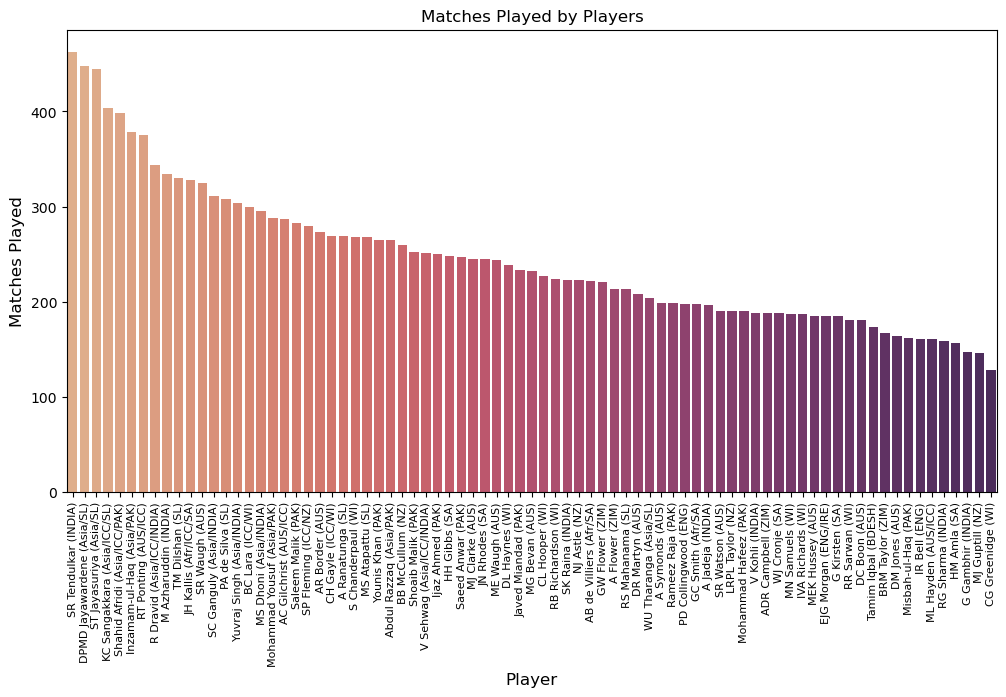

In [73]:
plt.figure(figsize=(12, 6))
mat = df[['Player', 'Mat']].sort_values('Mat', ascending=False)
sns.barplot(x='Player', y='Mat', data=mat, hue='Player', palette='flare')
plt.title('Matches Played by Players', fontsize=12)
plt.xlabel('Player', fontsize=12)
plt.ylabel('Matches Played', fontsize=12)
plt.xticks(rotation=90, fontsize=8)
plt.show()


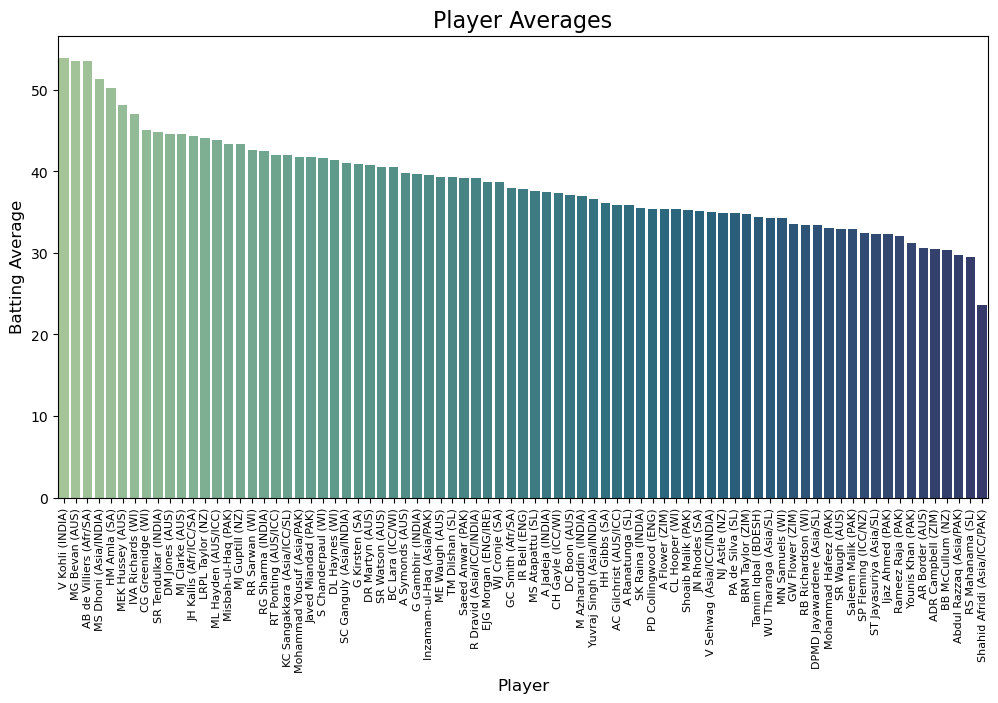

In [80]:
plt.figure(figsize=(12, 6))
avg = df[['Player', 'Ave']].sort_values('Ave', ascending=False)
sns.barplot(x='Player', y='Ave', data=avg, hue='Player', palette='crest')
plt.title('Player Averages', fontsize=16)
plt.xlabel('Player', fontsize=12)
plt.ylabel('Batting Average', fontsize=12)
plt.xticks(rotation=90, fontsize=8)  
plt.show()

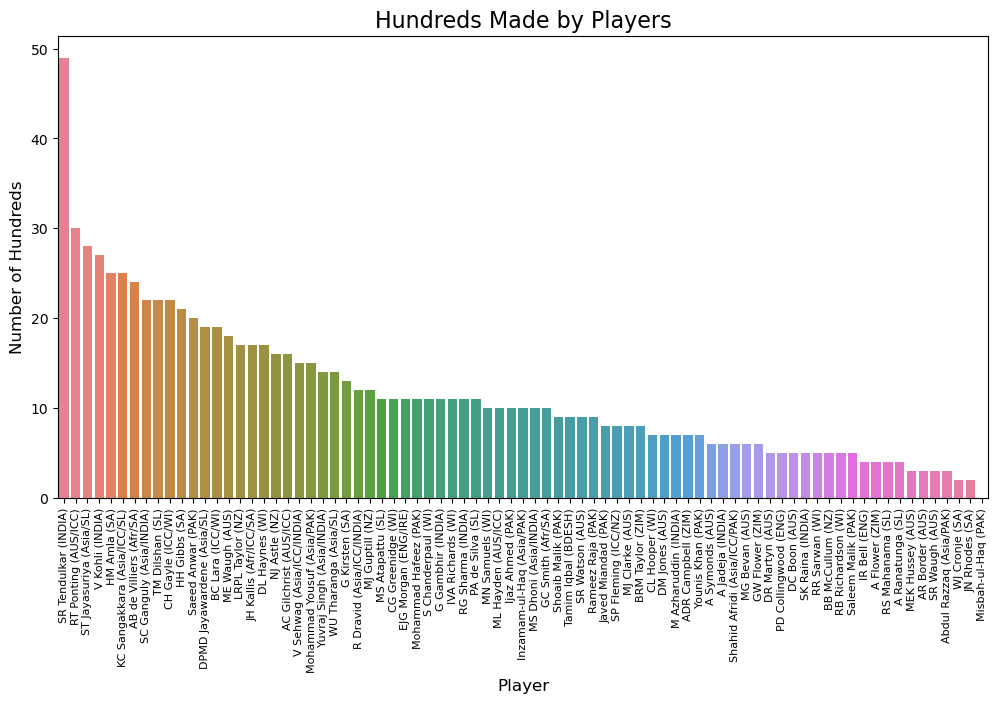

In [83]:
plt.figure(figsize=(12, 6))
hundreds = df[['Player', '100']].sort_values('100', ascending=False)
sns.barplot(x='Player', y='100', data=hundreds, hue='Player', legend=False)
plt.title('Hundreds Made by Players', fontsize=16)
plt.xlabel('Player', fontsize=12)
plt.ylabel('Number of Hundreds', fontsize=12)
plt.xticks(rotation=90, fontsize=8)
plt.show()

# Pairplot - plotting pairwise relationships between select player stats

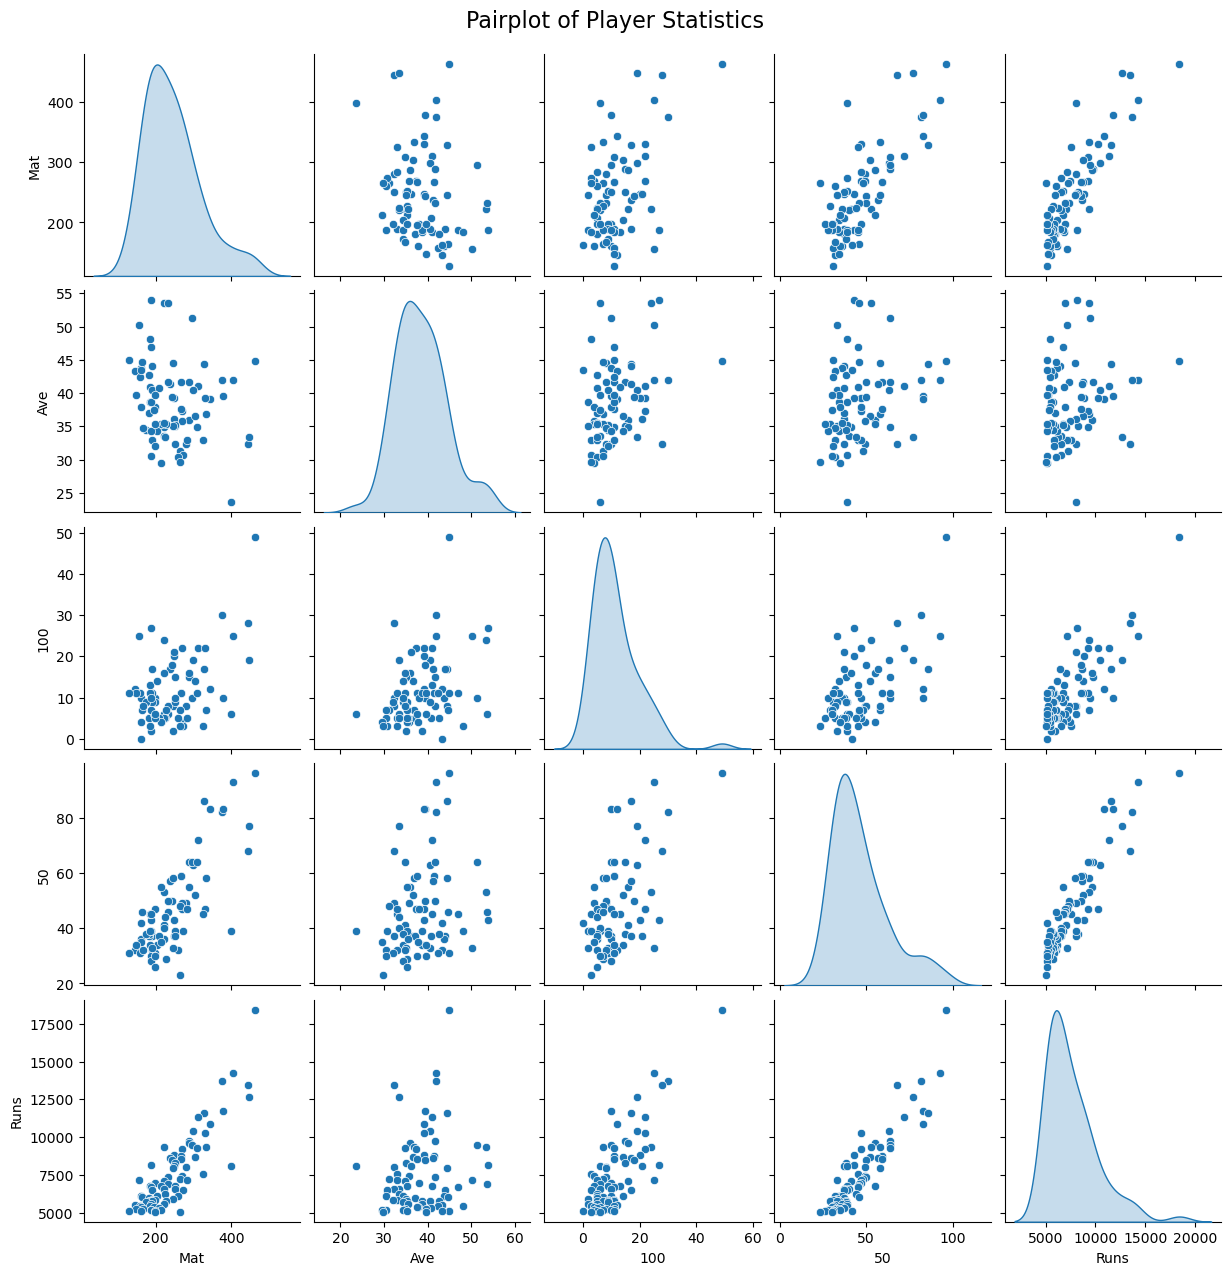

In [94]:
sns.pairplot(df[['Mat', 'Ave', '100', '50', 'Runs']], diag_kind='kde', kind='scatter')
plt.suptitle('Pairplot of Player Statistics', y=1.02, fontsize=16)
plt.show()

# Correlation matrix of (numeric) player stats

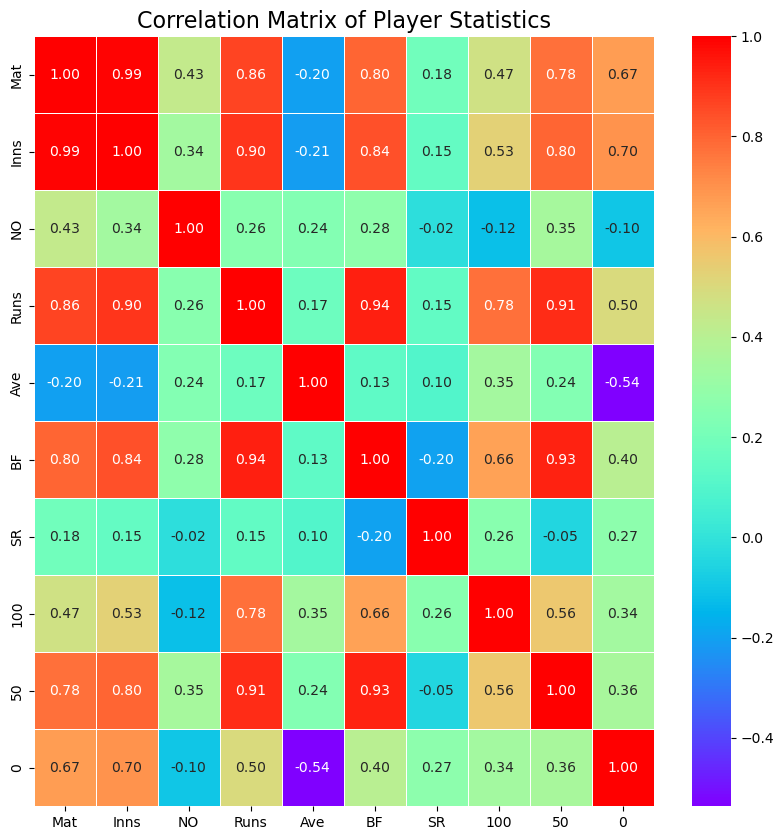

In [93]:
numeric_df = df.select_dtypes(include=['number'])

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10, 10))  
sns.heatmap(correlation_matrix, annot=True, cmap="rainbow", fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Player Statistics', fontsize=16) 
plt.show() 
